In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.sort_values(by='Fare',ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#df['Age']=df['Age'].fillna(df.Age.mean())

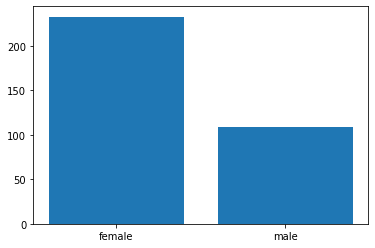

In [7]:
female_survived=len(df[(df['Survived']==1) & (df['Sex']=='female')])
male_survived=len(df[(df['Survived']==1) & (df['Sex']=='male')])
plt.bar(['female','male'],[female_survived,male_survived])
plt.show()

In [8]:
onehotencoding=pd.get_dummies(df.Sex)
merge=pd.concat([df,onehotencoding],axis='columns')
merge.drop(['Sex','male'],axis='columns')

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,0


In [9]:
final=merge.drop(['PassengerId','Name','Age','Sex','Ticket','Fare','Cabin','Embarked','male'],axis='columns')
final

,Survived,Pclass,SibSp,Parch,female
0,0,3,1,0,0
1,1,1,1,0,1
2,1,3,0,0,1
3,1,1,1,0,1
4,0,3,0,0,0
...,...,...,...,...,...
886,0,2,0,0,0
887,1,1,0,0,1
888,0,3,1,2,1
889,1,1,0,0,0


In [10]:
x=final.drop(['Survived'],axis='columns')
y=pd.DataFrame({'Survived':final.Survived})
x

,Pclass,SibSp,Parch,female
0,3,1,0,0
1,1,1,0,1
2,3,0,0,1
3,1,1,0,1
4,3,0,0,0
...,...,...,...,...
886,2,0,0,0
887,1,0,0,1
888,3,1,2,1
889,1,0,0,0


In [11]:
test=pd.read_csv('test.csv')
#test['Age']=test['Age'].fillna(test.Age.mean())
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
label=pd.get_dummies(test.Sex)
merge_test=pd.concat([test,label],axis='columns')
x_test=merge_test.drop(['PassengerId','Name','Sex','Ticket','Fare','Cabin','Embarked','male','Age'],axis='columns')
x_test

,Pclass,SibSp,Parch,female
0,3,0,0,0
1,3,1,0,1
2,2,0,0,0
3,3,0,0,0
4,3,1,1,1
...,...,...,...,...
413,3,0,0,0
414,1,0,0,1
415,3,0,0,0
416,3,0,0,0


In [20]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(x,y.values.ravel())
ypred=clf.predict(x_test)


In [21]:
#from sklearn.ensemble import RandomForestClassifier
#clf=RandomForestClassifier(n_estimators=97)
#clf.fit(x,y.values.ravel())

In [22]:
ypred=clf.predict(x_test) 
titanic_submission=pd.DataFrame({'PassengerId':test.PassengerId,'Survived':ypred})
titanic_submission.to_csv('titanic_submission.csv',index=False)


In [23]:
y_values=pd.read_csv('submission.csv')
actual_values=y_values.drop(['PassengerId'],axis=1)


In [24]:
from sklearn import metrics
metrics.accuracy_score(actual_values,ypred)

0.9784688995215312